In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 200

### Funções

In [2]:
def tabela_categoricas(df,col,name_col):
    df_1 = pd.DataFrame(df[col].value_counts()).reset_index()
    df_1.columns = [name_col,'Qtd empresas']
    df_1['%Total'] = (df_1['Qtd empresas']/len(df))*100
    return df_1

In [3]:
def distribuicaoNumericas(df,col,nameCol):
    med = pd.DataFrame(columns=[nameCol], index=['Media', 'Mediana', 'Minimo','Maximo'])
    med.loc['Media'][nameCol] = float(df[col].mean())
    med.loc['Mediana'][nameCol] = float(df[col].median())
    med.loc['Minimo'][nameCol] = float(df[col].min())
    med.loc['Maximo'][nameCol] = float(df[col].max())
    return med

### 0. Import Bases

In [4]:
### Import Bases
df = pd.read_csv('data/cnpjPreFiltrado.csv', encoding='utf-8')
df_desc_cnae = pd.read_csv('data/descricao_cnae.csv',encoding='latin1')
df_uf_regiao = pd.read_csv('data/uf_regiao.csv', encoding='utf-8')

In [5]:
df_cnpjs = df.copy()
df_cnpjs.head(2)

,cnpj,cd_secao_cnae,cnae,capital_social_empresa,porte_empresa,situacao,abertura,ativa,codigo_ibge,municipio,uf,cep
0,149757000303,A,111301,0.00,5,2004-02-10,1989-09-01,0,1100205,PORTO VELHO,RO,"78,905,770.00"
1,5915400000140,A,111301,0.00,5,2015-02-09,1986-03-10,0,1100205,PORTO VELHO,RO,"78,902,900.00"


In [6]:
df_cnpjs.shape

(42521762, 12)

In [7]:
# Descrição do Porte da Empresa
df_cnpjs['porte_empresa_descr']= df_cnpjs['porte_empresa'].replace([0,1,3,5],['NAO INFORMADO','MICRO EMPRESA','EMPRESA DE PEQUENO PORTE','DEMAIS'])
df_cnpjs['situacao_atividade']= df_cnpjs['ativa'].replace([0,1],['INATIVA','ATIVA'])

In [8]:
# Join para incluir descrição do CNAE
df_cnpjs = pd.merge(df_cnpjs, df_desc_cnae,how='left', on=['cd_secao_cnae'])
df_cnpjs = pd.merge(df_cnpjs, df_uf_regiao,how='left', on=['uf'])

In [9]:
df_cnpjs = df_cnpjs.dropna(subset=['situacao','abertura'])

In [10]:
#Verificação de Valores Ausentes
df_cnpjs.isnull().sum()

cnpj                       0
cd_secao_cnae              0
cnae                       0
capital_social_empresa     0
porte_empresa              0
situacao                   0
abertura                   0
ativa                      0
codigo_ibge                0
municipio                  0
uf                         0
cep                       11
porte_empresa_descr        0
situacao_atividade         0
descr_secao_cnae           0
regiao                     0
dtype: int64

In [11]:
# Extraindo informação do ano de abertura e situação, e tratando valores ausentes desse campo
df_cnpjs['ano_abertura'] = df_cnpjs['abertura'].str[:4].astype(int)
df_cnpjs['ano_situacao'] = df_cnpjs['situacao'].str[:4].astype(int)

In [12]:
df_cnpjs.head(3)

,cnpj,cd_secao_cnae,cnae,capital_social_empresa,porte_empresa,situacao,abertura,ativa,codigo_ibge,municipio,uf,cep,porte_empresa_descr,situacao_atividade,descr_secao_cnae,regiao,ano_abertura,ano_situacao
0,149757000303,A,111301,0.00,5,2004-02-10,1989-09-01,0,1100205,PORTO VELHO,RO,"78,905,770.00",DEMAIS,INATIVA,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",Norte,1989,2004
1,5915400000140,A,111301,0.00,5,2015-02-09,1986-03-10,0,1100205,PORTO VELHO,RO,"78,902,900.00",DEMAIS,INATIVA,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",Norte,1986,2015
2,15850654000181,A,111301,0.00,5,2008-12-31,1987-02-26,0,1100205,PORTO VELHO,RO,"78,902,900.00",DEMAIS,INATIVA,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",Norte,1987,2008


### 1. Porte da Empresa

In [13]:
tabela_categoricas(df_cnpjs,'porte_empresa_descr','Porte')

,Porte,Qtd empresas,%Total
0,MICRO EMPRESA,28785204,67.70
1,DEMAIS,12444289,29.27
2,EMPRESA DE PEQUENO PORTE,1292239,3.04
3,NAO INFORMADO,12,0.00


### 2. Distribuição por CNAE (Classificação Nacional de Atividades Econômicas)

In [14]:
tabela_categoricas(df_cnpjs,'descr_secao_cnae','CNAE')

,CNAE,Qtd empresas,%Total
0,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,15699182,36.92
1,OUTRAS ATIVIDADES DE SERVIÇOS,5737982,13.49
2,ALOJAMENTO E ALIMENTAÇÃO,3777456,8.88
3,INDÚSTRIAS DE TRANSFORMAÇÃO,3479977,8.18
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,2451340,5.76
5,CONSTRUÇÃO,2374291,5.58
6,"TRANSPORTE, ARMAZENAGEM E CORREIO",1913975,4.50
7,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",1882227,4.43
8,EDUCAÇÃO,999409,2.35
9,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",950471,2.24


### 3. Capital Social

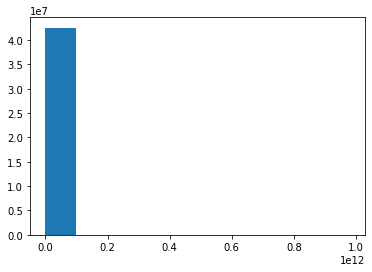

In [15]:
df_cnpjs['capital_social_empresa'].hist(grid = False)

In [16]:
distribuicaoNumericas(df_cnpjs,'capital_social_empresa','Capital Social - Empresas')

,Capital Social - Empresas
Media,"970,532.55"
Mediana,350.00
Minimo,0.00
Maximo,"979,787,731,300.00"


* Capital social igual a zero

In [17]:
df_cnpjs[df_cnpjs['capital_social_empresa']==0].shape[0]

16901942

* Capital social Maior que Zero

In [18]:
df_cnpjs[df_cnpjs['capital_social_empresa']>0].shape[0]

25619802

* Outlier

In [19]:
# Empresa com maior capital social declarado
df_cnpjs[df_cnpjs['capital_social_empresa']>979787731200]

,cnpj,cd_secao_cnae,cnae,capital_social_empresa,porte_empresa,situacao,abertura,ativa,codigo_ibge,municipio,uf,cep,porte_empresa_descr,situacao_atividade,descr_secao_cnae,regiao,ano_abertura,ano_situacao
42297092,19853740000107,S,9609299,"979,787,731,300.00",5,2014-02-24,2014-02-24,1,3304557,RIO DE JANEIRO,RJ,"23,082,180.00",DEMAIS,ATIVA,OUTRAS ATIVIDADES DE SERVIÇOS,Sudeste,2014,2014


### 4. Empresas Ativas e Inativas

In [20]:
ativas = df_cnpjs[df_cnpjs['ativa']==1]
inativas = df_cnpjs[df_cnpjs['ativa']==0]

In [21]:
tabela_categoricas(df_cnpjs,'situacao_atividade','Situação')

,Situação,Qtd empresas,%Total
0,ATIVA,24563700,57.77
1,INATIVA,17958044,42.23


### 5. Tempo de Vida das Empresas

#### 5.1 Ativas

In [22]:
ativas['tempo'] = 2020 - ativas['ano_abertura']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
distribuicaoNumericas(ativas,'tempo','Tempo Empresas Ativas')

,Tempo Empresas Ativas
Media,9.71
Mediana,6.00
Minimo,0.00
Maximo,419.00


* Removendo outlier

In [24]:
ativas = ativas[ativas['tempo']<200]

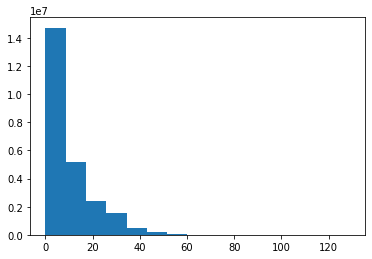

In [25]:
ativas['tempo'].hist(grid = False, bins = 15)

#### 5.2 Inativas

In [26]:
inativas['tempo'] = inativas['ano_situacao'] - inativas['ano_abertura']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
distribuicaoNumericas(inativas,'tempo','Tempo Empresas Inativas')

,Tempo Empresas Inativas
Media,8.39
Mediana,5.00
Minimo,-14.00
Maximo,308.00


* Removendo 1 outlier 

In [28]:
inativas = inativas[inativas['tempo']<200]

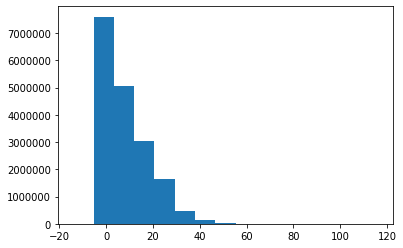

In [29]:
inativas['tempo'].hist(grid = False, bins = 15)

### 6. Abertura de Empresas

In [30]:
bases = [ativas,inativas]
df_cnpjs = pd.concat(bases)

#### 6.1 Abertura de Empresas ao longo do tempo

In [55]:
abert_anos = pd.DataFrame(df_cnpjs['ano_abertura'].value_counts()).reset_index()
abert_anos = abert_anos[abert_anos['index']>2000]
abert_anos.columns = ['Ano Abertura','Qtd Empresas']
abert_anos['Ano Abertura'] = abert_anos['Ano Abertura'].apply(str)
abert_anos = abert_anos.sort_values(by='Ano Abertura')

Text(0.5, 0, 'Ano Abertura')

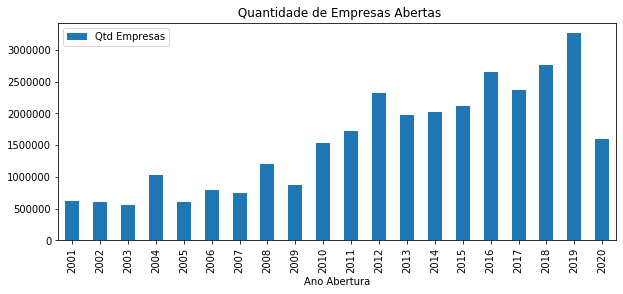

In [56]:
ax = abert_anos.plot(kind = "bar", x = 'Ano Abertura',title = " Quantidade de Empresas Abertas",figsize = (10,4))
ax.set_xlabel("Ano Abertura")

#### 6.3 CNAE que mais abriram empresas no ultimo ano

In [57]:
df_cnpjs_ult_ano = df_cnpjs[df_cnpjs['ano_abertura']>2018]

In [58]:
tabela_categoricas(df_cnpjs_ult_ano,'descr_secao_cnae','CNAE')

,CNAE,Qtd empresas,%Total
0,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,1290010,26.59
1,ALOJAMENTO E ALIMENTAÇÃO,517287,10.66
2,OUTRAS ATIVIDADES DE SERVIÇOS,472286,9.74
3,INDÚSTRIAS DE TRANSFORMAÇÃO,415828,8.57
4,"TRANSPORTE, ARMAZENAGEM E CORREIO",413174,8.52
5,CONSTRUÇÃO,387732,7.99
6,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",327970,6.76
7,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,314958,6.49
8,EDUCAÇÃO,191455,3.95
9,SAÚDE HUMANA E SERVIÇOS SOCIAIS,129077,2.66


### 7. Fechamento  de Empresas

#### 7.1 Fechamento de Empresas ao longo do tempo

In [60]:
fech_anos = pd.DataFrame(inativas['ano_situacao'].value_counts()).reset_index()
fech_anos = fech_anos[fech_anos['index']>2000]
fech_anos.columns = ['Ano Fechamento','Qtd Empresas']
fech_anos['Ano Fechamento'] = fech_anos['Ano Fechamento'].apply(str)
fech_anos = fech_anos.sort_values(by='Ano Fechamento')

Text(0.5, 0, 'Ano Fechamento')

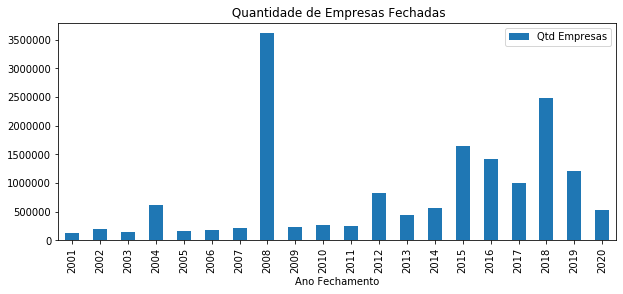

In [61]:
ax = fech_anos.plot(kind = "bar", x = 'Ano Fechamento',title = " Quantidade de Empresas Fechadas",figsize = (10,4))
ax.set_xlabel("Ano Fechamento")

### 8. Regiões Geograficas

#### 8.1 Quantidade de empresas por região

In [65]:
regiao = pd.DataFrame(df_cnpjs['regiao'].value_counts()).reset_index()
regiao.columns = ['Regiao','Qtd Empresas']
regiao['Regiao'] = regiao['Regiao'].apply(str)
regiao = regiao.sort_values(by='Regiao')

Text(0.5, 0, 'Regiao')

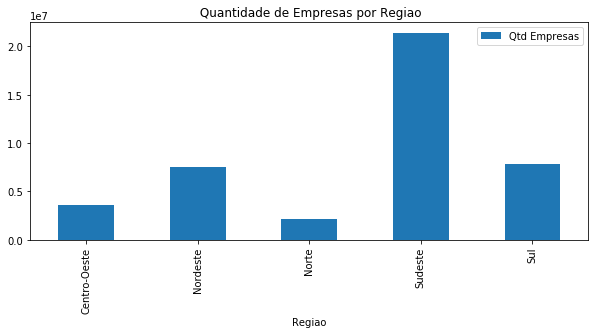

In [69]:
ax = regiao.plot(kind = "bar", x = 'Regiao',title = " Quantidade de Empresas por Regiao",figsize = (10,4))
ax.set_xlabel("Regiao")

In [91]:
estados = pd.DataFrame(df_cnpjs['uf'].value_counts()).reset_index()
estados.columns = ['Estados','Qtd Empresas']
estados = estados.sort_values(by='Estados')

Text(0.5, 0, 'Estados')

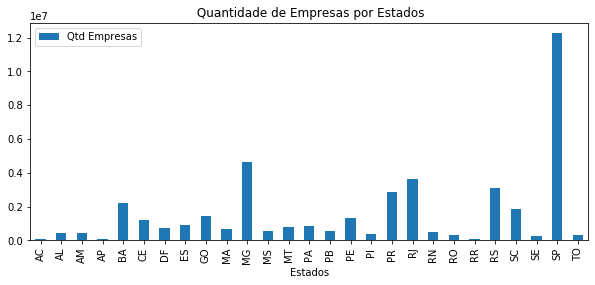

In [92]:
ax = estados.plot(kind = "bar", x = 'Estados',title = " Quantidade de Empresas por Estados",figsize = (10,4))
ax.set_xlabel("Estados")

In [93]:
estados

,Estados,Qtd Empresas
24,AC,104505
19,AL,415456
18,AM,442875
25,AP,100994
5,BA,2208913
9,CE,1231001
13,DF,725252
10,ES,886451
7,GO,1464956
14,MA,669694


#### 8.2  Estado com maior tempo de vida das empresas

* Maior Tempo 

In [80]:
estados = df_cnpjs[['uf','tempo']].drop_duplicates()
maior_tempo = estados.groupby(['uf']).max()
maior_tempo = maior_tempo.reset_index()
maior_tempo.columns = ['Estado (UF)','Tempo de Vida da Empresa(Max)']
maior_tempo.sort_values(by ='Tempo de Vida da Empresa(Max)', ascending = False ).head(10)

,Estado (UF),Tempo de Vida da Empresa(Max)
10,MG,129
25,SP,121
13,PA,119
23,SC,119
22,RS,119
18,RJ,119
17,PR,119
15,PE,119
1,AL,119
26,TO,119


* Tempo Médio

In [82]:
maior_tempo = estados.groupby(['uf']).mean()
maior_tempo = maior_tempo.reset_index()
maior_tempo.columns = ['Estado (UF)','Tempo de Vida da Empresa (Media)']
maior_tempo.sort_values(by ='Tempo de Vida da Empresa (Media)', ascending = False ).head(10)

,Estado (UF),Tempo de Vida da Empresa (Media)
15,PE,53.93
25,SP,49.36
10,MG,48.09
22,RS,47.82
4,BA,46.24
13,PA,44.48
5,CE,44.02
18,RJ,43.71
23,SC,42.68
17,PR,42.44


#### 8.2 Estados com menor tempo de vida das empresas

In [85]:
maior_tempo.sort_values(by ='Tempo de Vida da Empresa (Media)', ascending = True).head(10)

,Estado (UF),Tempo de Vida da Empresa (Media)
3,AP,26.98
21,RR,27.00
0,AC,28.00
11,MS,28.44
20,RO,28.63
16,PI,29.68
6,DF,29.97
12,MT,31.75
2,AM,34.53
9,MA,34.61


#### 8.4 Estados que mais  Fecharam Empresas

In [88]:
uf_fech = pd.DataFrame(inativas['uf'].value_counts()).reset_index()
uf_fech.columns = ['Estados','Qtd Empresas Fechadas']
uf_fech = uf_fech.sort_values(by='Estados')

Text(0.5, 0, 'Estados')

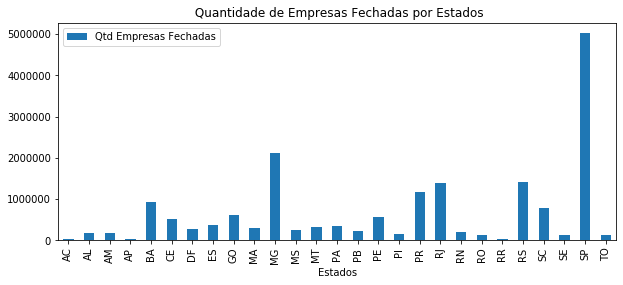

In [89]:
ax = uf_fech.plot(kind = "bar", x = 'Estados',title = " Quantidade de Empresas Fechadas por Estados",figsize = (10,4))
ax.set_xlabel("Estados")

In [90]:
uf_fech

,Estados,Qtd Empresas Fechadas
24,AC,45224
18,AL,189098
19,AM,187521
25,AP,43148
5,BA,937493
9,CE,509192
14,DF,280319
10,ES,363493
7,GO,618078
13,MA,295510
